# Diabetes dataset prediction

Packages we will be using 


In [ ]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')

Input data files (diabetes.csv) are available in the "./input/" directory.

Checking the existence of the file

In [ ]:
print('\n'.join(os.listdir('./input')))


diabetes.csv


**Reading the diabetes.csv file**

In [ ]:
diab = pd.read_csv('./input/diabetes.csv')

# **I. Preprocessing**


#1.Description for the data set


## 1.a.Reading the data

In [ ]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**bold text**## 1.b.What are the features?

In [ ]:
diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## 1.c.Number of individuals and features

In [ ]:
diab.shape

(768, 9)

##1.d.Total Description of the dataset

In [ ]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 2.Checking the existence of missing values

In [ ]:

features_with_na = [features for features in diab.columns if diab[features].isnull().sum()>1]


#  print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(diab[feature].isnull().mean(), 4),  ' % missing values')
features_with_na

[]

as we can see there are no null values in our dataset

# 3.Feature Extraction/ Selection:


## 3.a.Correlation matrix

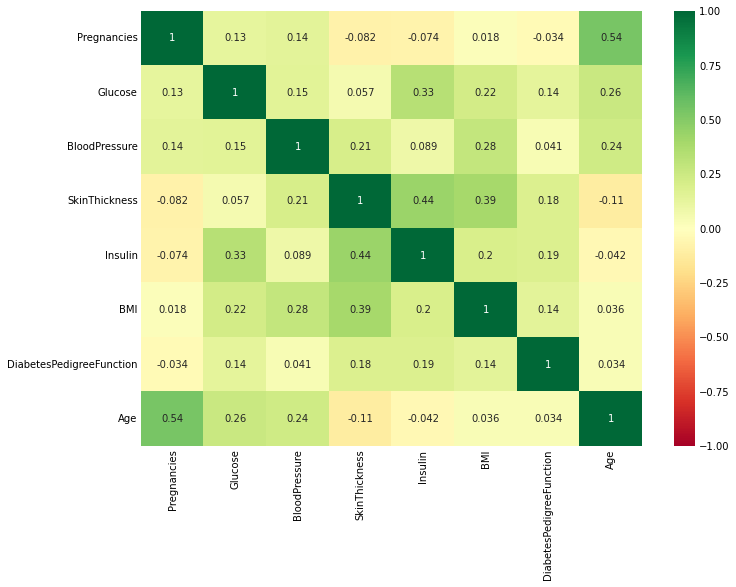

In [ ]:
cbar_kws = { 'ticks' : [-1, 1] }
sns.heatmap(diab[diab.columns[:8]].corr(),annot=True,cmap='RdYlGn',vmin=-1, vmax=1)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## 3.b.Feature extraction using Random Forest Classifier
(Random forest classifier: ensemble learning methods for classification tasks, the output of the random forest is the class selected by most trees.)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.242098
BMI                         0.172574
Age                         0.135220
DiabetesPedigreeFunction    0.128324
BloodPressure               0.092903
Pregnancies                 0.086774
SkinThickness               0.073109
Insulin                     0.068999
dtype: float64

### Observation:    
The important features are: Glucose, BMI, Age, DiabetesPedigreeFunction




### selecting only the important attributes


In [ ]:
diab2=diab[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
diab2.shape

(768, 5)

from now on we will be using diab2 which contains only the important columns.

# **II.Training**

### Splitting the data (train,test)

In [ ]:
#Let's create numpy arrays for features and target
X = diab2.drop('Outcome',axis=1).values
Y = diab2['Outcome'].values

split the data randomly into training and test set.

fit/train a classifier on the training set and make predictions on the test set. Then we will compare the predictions with the known labels.

Scikit-learn provides facility to split data into train and test set using train_test_split method.

 we will  use the stratify argument  to perform our split in such a way that the split reflects best the labels in the data.

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42, stratify=Y)


# 1.KNN

### finding the best k parameter

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X=diab2[diab2.columns[:4]]
Y=diab2['Outcome']

from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,Y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7682709447415329
Best Parameters: {'n_neighbors': 19}


### predicting for k=19

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#creating the knn clasifier
#note : knn is a lazy learner algorithm, it does not create a model. 
#what we mean by model  here is just an object to make the calculations for us each time.

modelK = KNeighborsClassifier(n_neighbors=19)

#transforming the pandas dataframe into a python list so it can  be given as an argument to the knn model.
Row_list =[]
Outcoms = []
for index, rows in diab2.iterrows():
  aRow =[rows.Glucose, rows.BMI, rows.Age,rows.DiabetesPedigreeFunction]
  outcom = rows.Outcome

  Row_list.append(aRow)
  Outcoms.append(outcom)

modelK.fit(Row_list,Outcoms)
predicted= modelK.predict([[100,21,23,0.5]])

print("********************")
print("outcom for an individual with Glucose level=100,BMI=21,Age=23 and DiabetesPedigreeFunction=0.5 ")
print(predicted)
print("********************")

********************
outcom for an individual with Glucose level=100,BMI=21,Age=23 and DiabetesPedigreeFunction=0.5 
[0.]
********************


# 2.Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
modelB = GaussianNB()
modelB.fit(X_train,Y_train)


GaussianNB()

# III.**Evaluation**

# 1.KNN Evaluation


In [ ]:
from sklearn.metrics import confusion_matrix

Y_pred = modelK.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
modelK.score(X_test,Y_test)

[[173  28]
 [ 46  61]]


0.7597402597402597

# 2.NaiveBayes Evaluation

In [ ]:
from sklearn import metrics

Y_pred= modelB.predict(X_test)
acc= metrics.accuracy_score(Y_test,Y_pred)
print(acc)
print(confusion_matrix(Y_test,Y_pred))

0.7597402597402597
[[175  26]
 [ 48  59]]
